In [70]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as ps
import joblib
import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv('Titanic_Dataset.csv')

In [72]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df.rename(columns={'Pclass':'Passenger_Class'},inplace=True)
df.rename(columns={'SibSp':'total_siblings_and_spouses_aboard'},inplace=True)
df.rename(columns={'Parch':'total_parents_and_children_aboard'},inplace=True)
df.head()

,PassengerId,Survived,Passenger_Class,Name,Sex,Age,total_siblings_and_spouses_aboard,total_parents_and_children_aboard,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
# Define the extract_title function
def extract_title(name):
    titles = ['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Dr.', 'Rev.']
    for title in titles:
        if title in name:
            return title
    return 'Other'

# Create a new 'Title' column
df['Title'] = df['Name'].apply(lambda x: extract_title(x))

In [75]:
columns_to_drop = ['Ticket', 'Cabin','Name', 'PassengerId']
existing_columns = [col for col in columns_to_drop if col in df.columns]
if existing_columns:
    df.drop(existing_columns, axis=1, inplace=True)
df.head()

,Survived,Passenger_Class,Sex,Age,total_siblings_and_spouses_aboard,total_parents_and_children_aboard,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.


In [76]:
def preprocess_data(data):
    
    # Handle missing values
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Fare'].fillna(data['Fare'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

    # Convert categorical variables to numerical
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
    data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    data['Title'] = data['Title'].map({'Mr.': 0, 'Mrs.': 1, 'Miss.': 2, 'Master.': 3, 'Dr.': 4, 'Rev.': 5, 'Other': 6})

    # Convert 'Age' to integers
    data['Age'] = data['Age'].astype(int)
    
    return data

df = preprocess_data(df)
df.head()

,Survived,Passenger_Class,Sex,Age,total_siblings_and_spouses_aboard,total_parents_and_children_aboard,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,0,0
1,1,1,1,38,1,0,71.2833,1,1
2,1,3,1,26,0,0,7.9250,0,2
3,1,1,1,35,1,0,53.1000,0,1
4,0,3,0,35,0,0,8.0500,0,0


In [77]:
print(f'Data Frame Shape (rows, columns): {df.shape}')

Data Frame Shape (rows, columns): (891, 9)


In [78]:
df.describe()

,Survived,Passenger_Class,Sex,Age,total_siblings_and_spouses_aboard,total_parents_and_children_aboard,Fare,Embarked,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.345679,0.523008,0.381594,32.204208,0.361392,0.842873
std,0.486592,0.836071,0.477990,13.028212,1.102743,0.806057,49.693429,0.635673,1.229781
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,6.000000


In [79]:
len(df.Survived.unique())

2

In [80]:
Sum = df.isnull().sum()
Percentage = ( df.isnull().sum()/df.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
Survived,0,0.0
Passenger_Class,0,0.0
Sex,0,0.0
Age,0,0.0
total_siblings_and_spouses_aboard,0,0.0
total_parents_and_children_aboard,0,0.0
Fare,0,0.0
Embarked,0,0.0
Title,0,0.0


In [81]:
df.head()

,Survived,Passenger_Class,Sex,Age,total_siblings_and_spouses_aboard,total_parents_and_children_aboard,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,0,0
1,1,1,1,38,1,0,71.2833,1,1
2,1,3,1,26,0,0,7.9250,0,2
3,1,1,1,35,1,0,53.1000,0,1
4,0,3,0,35,0,0,8.0500,0,0


<Axes: >

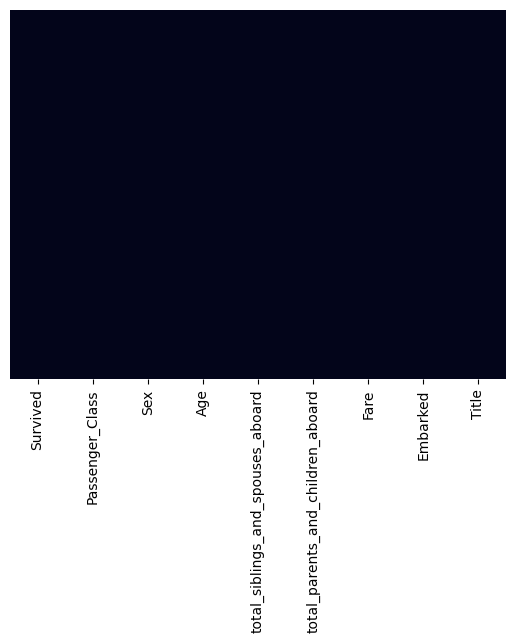

In [82]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [83]:
Sum = df.isnull().sum()
Percentage = ( df.isnull().sum()/df.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
Survived,0,0.0
Passenger_Class,0,0.0
Sex,0,0.0
Age,0,0.0
total_siblings_and_spouses_aboard,0,0.0
total_parents_and_children_aboard,0,0.0
Fare,0,0.0
Embarked,0,0.0
Title,0,0.0


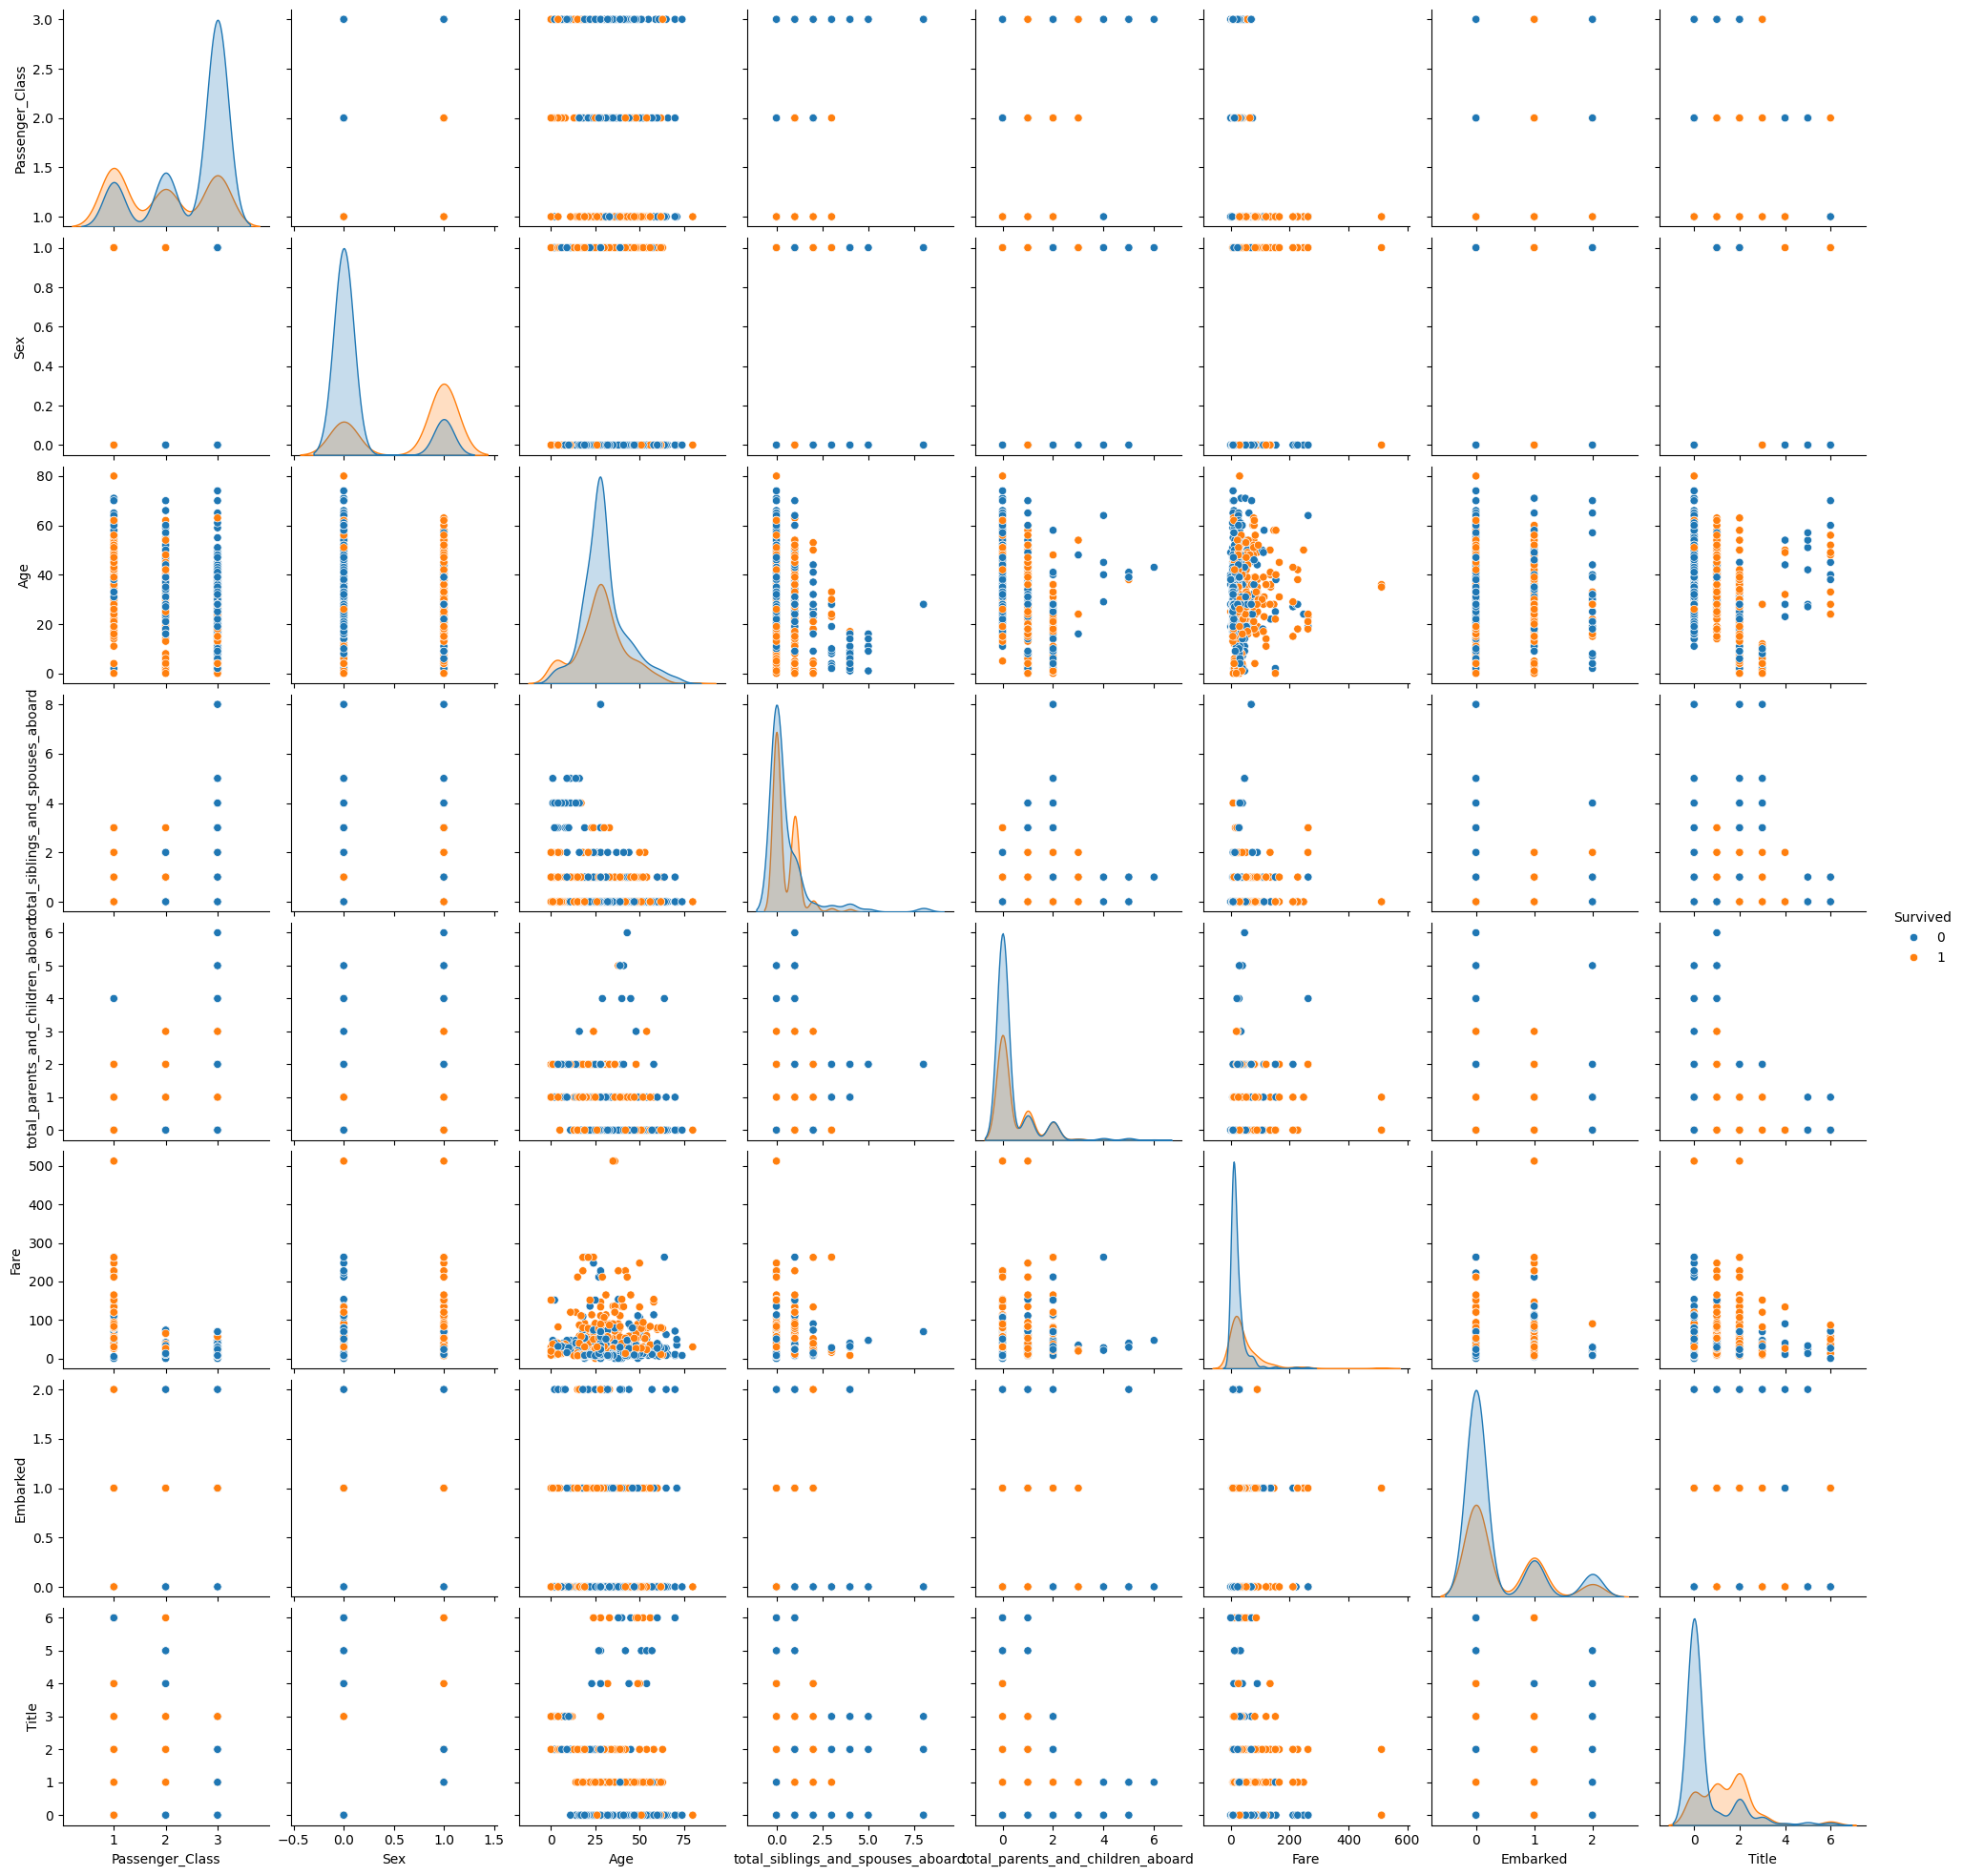

In [84]:
sns.pairplot(df, hue="Survived")

Text(0, 0.5, 'correlation')

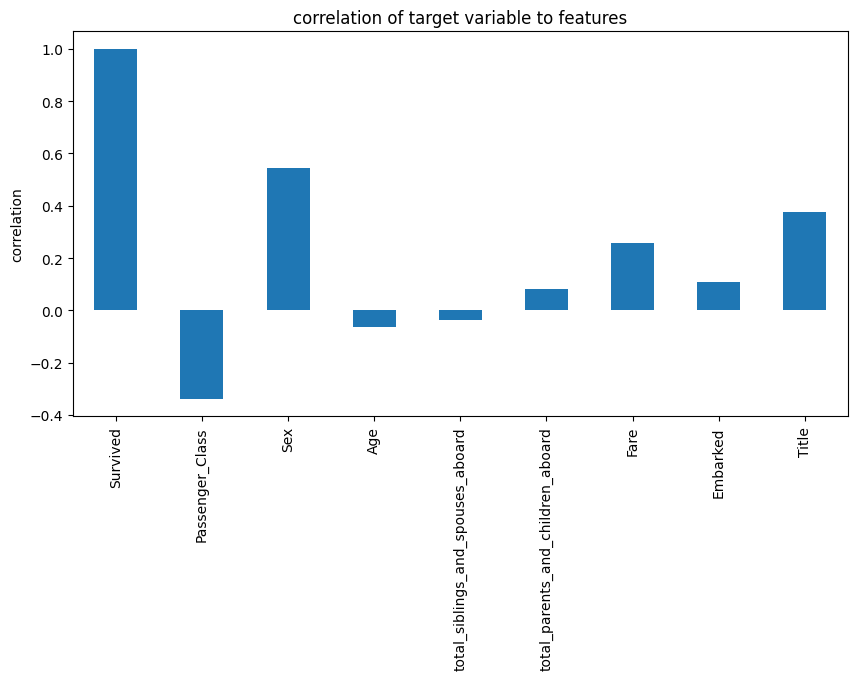

In [85]:
plt.figure(figsize=(10,5))
ax = df.corr()['Survived'].plot(kind='bar',title='correlation of target variable to features')
ax.set_ylabel('correlation')

In [86]:
df = df.astype({
    'Survived': int,
    'Passenger_Class': int,
    'Sex': int,
    'Age': int,
    'total_siblings_and_spouses_aboard': int,
    'total_parents_and_children_aboard': int,
    'Fare': float,
    'Embarked': int,
    'Title': int
}).round({'Fare': 2})

In [87]:
df.head()

,Survived,Passenger_Class,Sex,Age,total_siblings_and_spouses_aboard,total_parents_and_children_aboard,Fare,Embarked,Title
0,0,3,0,22,1,0,7.25,0,0
1,1,1,1,38,1,0,71.28,1,1
2,1,3,1,26,0,0,7.92,0,2
3,1,1,1,35,1,0,53.10,0,1
4,0,3,0,35,0,0,8.05,0,0


Text(0.5, 1.0, 'Survived')

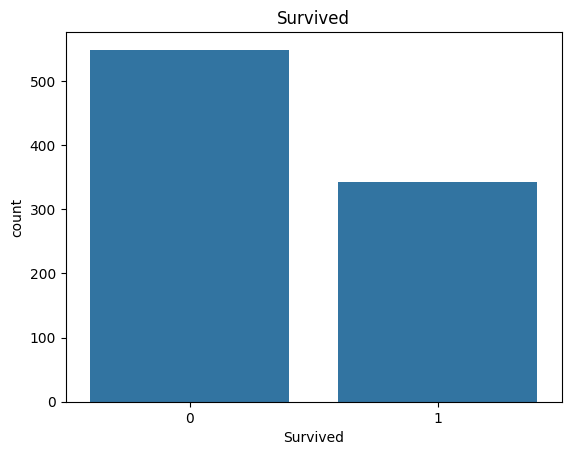

In [88]:
sns.countplot(data=df, x="Survived").set_title("Survived")

In [89]:
import tpot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [90]:
X = df.drop(columns=['Survived'],axis=1) 
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [91]:
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [92]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy in Train set   : 0.80
Accuracy in Test  set   : 0.83


In [93]:
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [94]:
AutoML.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8454840933714174

Generation 2 - Current best internal CV score: 0.8454840933714174

Generation 3 - Current best internal CV score: 0.8454840933714174

Generation 4 - Current best internal CV score: 0.8454840933714174

Generation 5 - Current best internal CV score: 0.8454840933714174

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.4, min_samples_leaf=1, min_samples_split=16, n_estimators=100)


TPOTClassifier(generations=5, verbosity=2)

In [95]:
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [96]:
AutoML.fit(X,y)
#save model 
with open('model-v1.joblib', 'wb') as f:
    joblib.dump(lr,f)

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8428849413093967

Generation 2 - Current best internal CV score: 0.8462494507563869

Generation 3 - Current best internal CV score: 0.8462494507563869

Generation 4 - Current best internal CV score: 0.8485029188374866

Generation 5 - Current best internal CV score: 0.8485029188374866

Best pipeline: RandomForestClassifier(SGDClassifier(input_matrix, alpha=0.0, eta0=1.0, fit_intercept=False, l1_ratio=0.25, learning_rate=constant, loss=squared_hinge, penalty=elasticnet, power_t=1.0), bootstrap=True, criterion=gini, max_features=0.8500000000000001, min_samples_leaf=1, min_samples_split=15, n_estimators=100)


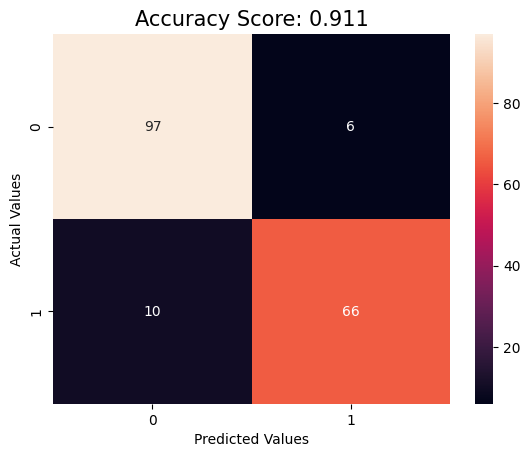

In [97]:
from sklearn.metrics import confusion_matrix as cm

predictions = AutoML.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [98]:
AutoML.export('pipeline.py')